# Air Data 2024

This notebook explores + analyses data from the UK's Civil Aviation Authority (CAA) regarding various statistics for UK-registered airlines. This analysis will aim to answer the following research question:
> **What can explain patterns in air travel data during 2024?**

### Features and their context
The CAA dataset has collected the following statistics. Their description is also available in the 'Dataset overview.pdf' file.
| Feature | Description | Unit |
| --- | --- | --- |
| reporting_period | The month to which the record pertains. | |
| type_of_operations | Whether the airline carries passengers or cargo. | |
| airline_name | The trading name of the airline. | |
| aircraft_km_x1000 | The number of flights performed, multiplied by the stage distance for that flight. | 1000km |
| no_flights | The number of flights that the airline performed in the time period. | |
| aircraft_hours | The total number of hours spent operating aircraft, 'block-to-block', i.e. from the moment of pushback to the moment of parking. | hours |
| total_passengers_uplifted | The total number of passengers carried by the airline in the time period. Passengers are only counted once per flight number, not duplicated on separate stages of the same journey. | |
| seat_km_available_x1000 | The number of seats available to be booked on the flight, multiplied by its stage distance, summed over all flights. | 1000km|
| seat_km_usedx1000 | The number of seats purchased on the flight, multiplied by its stage distance, summed up over all flights. | 1000km |
| cargo_tonnes_uplifted | The total amount of cargo carried by the airline in the time period. | tonnes (1000kg) |
| total_tonne_km_availablex1000 | The amount of tonnes available for the carriage of revenue cargo on a flight, multiplied by the stage distance, summed up over all flights | 1000 tonne km |
| tot_mail_tonne_km_used_x1000 | The total amount of tonne kilometers of mail cargo. | 1000 tonne km |
| total_freight_tonne_km_used_x1000 | The total amount of tonne kilometers of freight cargo. | 1000 tonne km |
| total_passenger_tonne_km_used_x1000| The total amount of tonne kilometers of passenger cargo. | 1000 tonne km |

### Initial imports & cleaning

In [38]:
# package imports
import pandas as pd
import os
import glob
import seaborn as sns

In [39]:
# import dataset
dataframes = []
path = './input/airdatamonths/'
files = glob.glob(os.path.join(path, '*.csv'))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
print('Dataframe succesfully loaded.')

# Change numerical month code to text
reporting_periods = {202401:'Jan', 202402:'Feb', 202403:'Mar', 202404:'Apr',202405:'May',202406:'Jun',202407:'Jul', 202408:'Aug', 202409:'Sep', 202410:'Oct', 202411:'Nov', 202412:'Dec'}
df['reporting_period'] = df['reporting_period'].replace(reporting_periods)

# Remove unnecessary 'rundate' column
df.drop(['rundate'], axis=1, inplace=True)

Dataframe succesfully loaded.


### Exploratory Data Analysis

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Total Flights')]

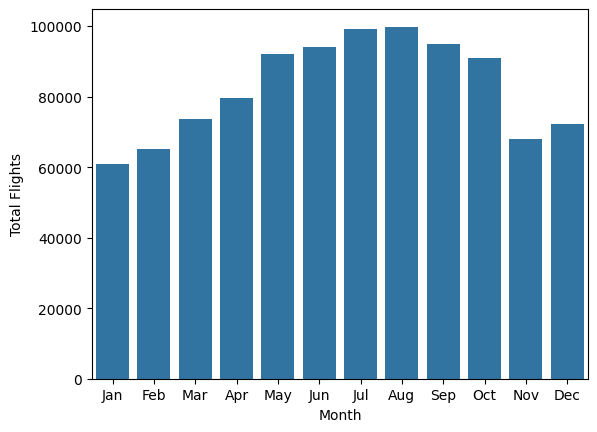

In [40]:
# First, a scaled bar chart of the total number of flights for each month
month_list = reporting_periods.values()
month_flights_list = []
for month in month_list:
    month_flights = sum(df[df['reporting_period'] == month].no_flights)
    month_flights_list.append((month, month_flights))
month_flights_df = pd.DataFrame(month_flights_list, columns=['month', 'total_flights'])

fig = sns.barplot(data=month_flights_df, x='month', y='total_flights')
fig.set(xlabel='Month', ylabel='Total Flights')

As expected, the total number of flights performed by UK airlines peaks over the summer holiday season and is lowest over the November-January period, with a slight surge for Christmas break holidays in December.